In [0]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

For the data set from [UCI's Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Spambase), they have already gone through and processed 4,000 instances of spam and non-spam (ham) emails.  Each line of the data set appears to be one email, and certain features of the email have been counted and categorized for each feature.  The last column is whether or not the email is spam or ham.

In [0]:
headers = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
         "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
         "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
         "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your",
         "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george",
         "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
         "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm",
         "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
         "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
         "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
         "capital_run_length_longest", "capital_run_length_total", "spam"]

spam = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header = None, names = headers)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [0]:
summary = spam.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_address,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_all,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_3d,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_our,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180
word_freq_receive,4601.0,0.059824,0.201545,0.0,0.000,0.000,0.000,2.610


We can see some interesting things about the data set, such as the mean appearance of `word_freq_money` seems to be slightly more than the frequency of `char_freq_$`.  Moreover, the usage and length of capital letters would seem like a good signifier of spam.  The means for `length_longest` and `length_total` are much higher than any other category. 

## Modeling

We'll use a traditional 75/25 split for our train and test data.

In [0]:
spam_train, spam_test = train_test_split(spam, test_size = 0.25, random_state = 42)

Our first attempt at classifying the spam emails will be with a decision tree.

To read the decision tree, all the rows in the dataset start at the top of the tree.  The algorithm determines the best way to split the tree based on the 'Gini Impurity' criteria which is a mathematical equation who's goal is to minimize misclassification.  The top of the 'leaf' shows the feature name and the split value where the rest of the rows will fall under.  'Samples' shows how many samples are being analyzed and the 'value' shows the vector in ['Ham', 'Spam'] format.  A leaf will not split if there are 20 samples or less.

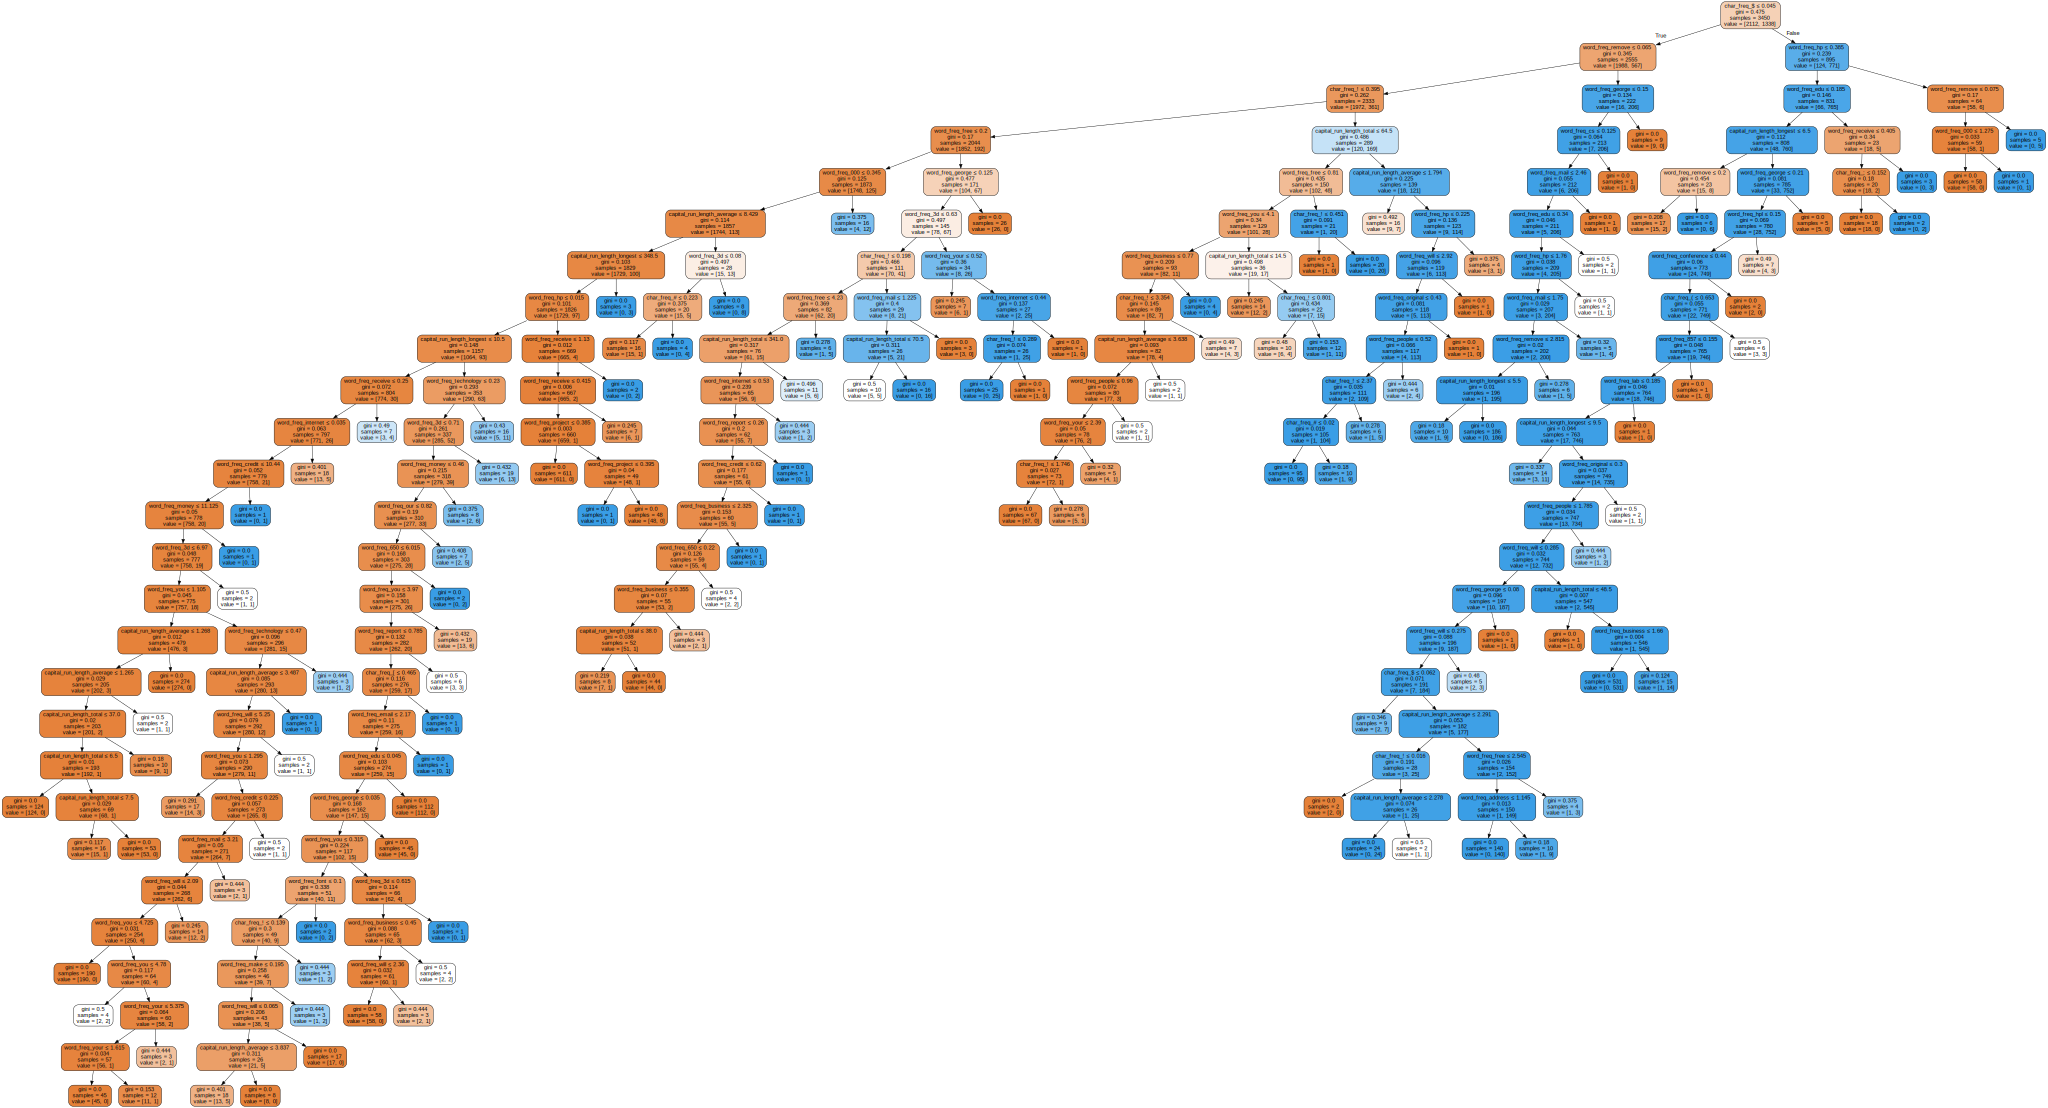

In [0]:
# Decision Tree

#Make a list of names for the decision tree
features = headers.copy()
features.remove('spam')

#Must have a minimum of 20 samples before they are split
clf = tree.DecisionTreeClassifier(random_state=123, min_samples_split=20)
clf = clf.fit(spam_train.iloc[:, 0:56], spam_train.iloc[:, 56])

dot_data = tree.export_graphviz(clf, out_file = None, feature_names=features,
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

We will also use a naive Bayes model, which is more probabilistic than the decision tree.  Each feature has a probability rating based on its frequency in the training set, and also based on the prior probability of each label.  It assumes that each feature is independent of the others.

In [0]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(spam_train.iloc[:,0:55], spam_train.iloc[:, 56])

In [0]:
gnb.get_params(deep = False)

{'priors': None, 'var_smoothing': 1e-09}

## Predictions

In [0]:
# Decision Tree Prediction

clf_pred = clf.predict(spam_test.iloc[:, 0:55])
print("Accuracy:", metrics.accuracy_score(spam_test.iloc[:, 56], clf_pred))

Accuracy: 0.9174630755864466


The confusion matrix below shows how the emails were categorized using the DecisionTreeClassifier.  The upper-left corner and lower-right corner were the correctly categorized emails as 'Ham' or 'Spam'.  The upper-right corner are the emails that were predicted as 'Spam' but were actually 'Ham' and the lower-left corner were the emails that were predicted as 'Ham' and were actually 'Spam'.  

[Text(0, 0.5, 'Spam'), Text(0, 1.5, 'Ham')]

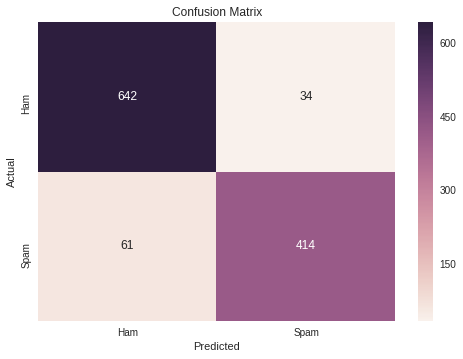

In [0]:
cf = metrics.confusion_matrix(spam_test.iloc[:, 56], clf_pred)

ax = plt.subplot()
sns.heatmap(cf, annot=True, ax=ax, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Ham', 'Spam'])
ax.yaxis.set_ticklabels(['Spam', 'Ham'])

In [0]:
# Naive Bayes Prediction
gnb_pred = gnb.predict(spam_test.iloc[:, 0:55])
print("Accuracy:", metrics.accuracy_score(spam_test.iloc[:, 56], gnb_pred))

Accuracy: 0.8271068635968722


The confusion matrix below shows the accuracy of the Naive Bayes model. The format is the same like the decision tree confusion matrix.  The difference is that there were more 'Ham' emails that were predicted as 'Spam'

[Text(0, 0.5, 'Spam'), Text(0, 1.5, 'Ham')]

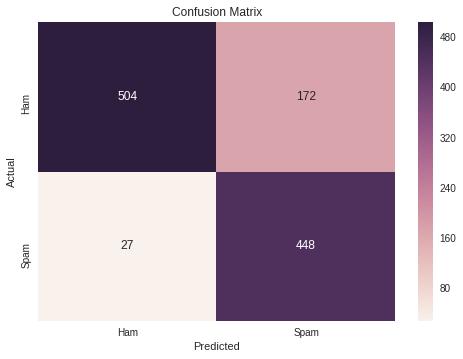

In [0]:
cf2 = metrics.confusion_matrix(spam_test.iloc[:, 56], gnb_pred)

ax = plt.subplot()
sns.heatmap(cf2, annot=True, ax=ax, fmt='g')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Ham', 'Spam'])
ax.yaxis.set_ticklabels(['Spam', 'Ham'])

In this instance, the decision tree performed better at predicting whether or not an email was spam.  It would be possible to use the model for other sets of emails, if that data set was processed in a manner similar to the UCI dataset.  In addition, certain features would have to be personalized: `word_freq_george` would  need to be replaced with your own name, for instance.